1.Wealth distribution analysis: Explore the distribution of billionaires' wealth across different industries, countries, and regions.
2.Demographic analysis: Investigate the age, gender, and birthplace demographics of billionaires.
3.Self-made vs. inherited wealth: Analyze the proportion of self-made billionaires and those who inherited their wealth.
4.Economic indicators: Study correlations between billionaire wealth and economic indicators such as GDP, CPI, and tax rates.
5.Geospatial analysis: Visualize the geographical distribution of billionaires and their wealth on a map.
6.Trends over time: Track changes in billionaire demographics and wealth over the years.

above are the objectives for the analysis

In [1]:
# import the necesssay libraries 
import pandas as pd 
import numpy as np 
data_b=pd.read_csv("Billionaires Statistics Dataset.csv")
data_b.head()

,rank,finalWorth,category,personName,age,country,city,source,industries,countryOfCitizenship,...,cpi_change_country,gdp_country,gross_tertiary_education_enrollment,gross_primary_education_enrollment_country,life_expectancy_country,tax_revenue_country_country,total_tax_rate_country,population_country,latitude_country,longitude_country
0,1,211000,Fashion & Retail,Bernard Arnault & family,74.0,France,Paris,LVMH,Fashion & Retail,France,...,1.1,"$2,715,518,274,227",65.6,102.5,82.5,24.2,60.7,67059887.0,46.227638,2.213749
1,2,180000,Automotive,Elon Musk,51.0,United States,Austin,"Tesla, SpaceX",Automotive,United States,...,7.5,"$21,427,700,000,000",88.2,101.8,78.5,9.6,36.6,328239523.0,37.090240,-95.712891
2,3,114000,Technology,Jeff Bezos,59.0,United States,Medina,Amazon,Technology,United States,...,7.5,"$21,427,700,000,000",88.2,101.8,78.5,9.6,36.6,328239523.0,37.090240,-95.712891
3,4,107000,Technology,Larry Ellison,78.0,United States,Lanai,Oracle,Technology,United States,...,7.5,"$21,427,700,000,000",88.2,101.8,78.5,9.6,36.6,328239523.0,37.090240,-95.712891
4,5,106000,Finance & Investments,Warren Buffett,92.0,United States,Omaha,Berkshire Hathaway,Finance & Investments,United States,...,7.5,"$21,427,700,000,000",88.2,101.8,78.5,9.6,36.6,328239523.0,37.090240,-95.712891


# Data cleaning / preprocessing 

In [2]:
#check for data types and data quality 
data_b.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2640 entries, 0 to 2639
Data columns (total 35 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   rank                                        2640 non-null   int64  
 1   finalWorth                                  2640 non-null   int64  
 2   category                                    2640 non-null   object 
 3   personName                                  2640 non-null   object 
 4   age                                         2575 non-null   float64
 5   country                                     2602 non-null   object 
 6   city                                        2568 non-null   object 
 7   source                                      2640 non-null   object 
 8   industries                                  2640 non-null   object 
 9   countryOfCitizenship                        2640 non-null   object 
 10  organization

In [3]:
# change datatypes for the gdp country,latitude and longitudes values 
data_b['gdp_country']= data_b['gdp_country'].str.replace(',', '').str.replace('$', '').astype(float)
data_b[["latitude_country","latitude_country"]]=data_b[["latitude_country","latitude_country"]].astype(float)

In [4]:
data_b.shape

(2640, 35)

In [5]:
#check for missing values 
data_b.isnull().sum()

rank                                             0
finalWorth                                       0
category                                         0
personName                                       0
age                                             65
country                                         38
city                                            72
source                                           0
industries                                       0
countryOfCitizenship                             0
organization                                  2315
selfMade                                         0
status                                           0
gender                                           0
birthDate                                       76
lastName                                         0
firstName                                        3
title                                         2301
date                                             0
state                          

In [6]:
#duplicates 
data_b.duplicated().sum()

0

In [7]:
# fill the missing values 
data_b["age"].fillna(data_b["age"].mean(),inplace =True)
data_b['country'].fillna(data_b['countryOfCitizenship'],inplace=True)
data_b['organization'].fillna("not specified",inplace= True)
data_b['state'].fillna("not specified",inplace= True)
data_b['residenceStateRegion'].fillna("not specified",inplace= True)
data_b["cpi_country"].fillna(data_b["cpi_country"].mean(),inplace =True)
data_b["cpi_change_country"].fillna(data_b["cpi_change_country"].mean(),inplace =True)
list=["cpi_change_country","gdp_country","gross_tertiary_education_enrollment","gross_primary_education_enrollment_country","population_country","tax_revenue_country_country","life_expectancy_country","total_tax_rate_country"]
for column in list:
    c_mean=data_b[column].mean()
    data_b[column].fillna(c_mean, inplace=True)
    
name_mapping = {'Tahir': 'Muhammad','Jay-Z': 'Shawn','Rihanna': 'Robyn'}
for lastName,firstName in name_mapping.items():
    data_b.loc[data_b['lastName'] ==lastName,'firstName'] =firstName
data_b['title'].fillna(data_b['title'].mode().iloc[0],inplace=True)


In [8]:
Countries = {
"Afghanistan" : "Kabul",
"Albania" : "Tirana",
"Algeria" : "Algiers",
"Andorra" : "Andorra la Vella",
"Angola" : "Luanda",
"Antigua and Barbuda" : "Saint John’s",
"Argentina" : "Buenos Aires",
"Armenia" : "Yerevan",
"Australia" : "Canberra",
"Austria" : "Vienna",
"Azerbaijan" : "Baku",
"The Bahamas" : "Nassau",
"Bahrain" : "Manama",
"Bangladesh" : "Dhaka",
"Barbados" : "Bridgetown",
"Belarus" : "Minsk",
"Belgium" : "Brussels",
"Belize" : "Belmopan",
"Benin" : "Porto-Novo",
"Bhutan" : "Thimphu",
"Bolivia" : "La Paz, Sucre",
"Bosnia and Herzegovina" : "Sarajevo",
"Botswana" : "Gaborone",
"Brazil" : "Brasilia",
"Brunei" : "Bandar Seri Begawan",
"Bulgaria" : "Sofia",
"Burkina Faso" : "Ouagadougou",
"Burundi" : "Bujumbura",
"Cambodia" : "Phnom Penh",
"Cameroon" : "Yaounde",
"Canada" : "Ottawa",
"Cape Verde" : "Praia",
"Central African Republic" : "Bangui",
"Chad" : "N’Djamena",
"Chile" : "Santiago",
"China" : "Beijing",
"Colombia" : "Bogota",
"Comoros" : "Moroni",
"Republic of the Congo": "Brazzaville",
"Democratic Republic of the Congo" : "Kinshasa",
"Costa Rica" : "San Jose",
"Cote d’Ivoire" : "Yamoussoukro",
"Croatia" : "Zagreb",
"Cuba" : "Havana",
"Cyprus" : "Nicosia",
"Czech Republic" : "Prague",
"Denmark" : "Copenhagen",
"Djibouti" : "Djibouti",
"Dominica" : "Roseau",
"Dominican Republic" : "Santo Domingo",
"East Timor" : "Dili",
"Ecuador" : "Quito",
"Egypt" : "Cairo",
"El Salvador" : "San Salvador",
"Equatorial Guinea" : "Malabo",
"Eritrea" : "Asmara",
"Estonia" : "Tallinn",
"Ethiopia" : "Addis Ababa",
"Fiji" : "Suva",
"Finland" : "Helsinki",
"France" : "Paris",
"Gabon" : "Libreville",
"The Gambia" : "Banjul",
"Georgia" : "Tbilisi",
"Germany" : "Berlin",
"Ghana" : "Accra",
"Greece" : "Athens",
"Grenada" : "Saint George’s",
"Guatemala" : "Guatemala City",
"Guinea" : "Conakry",
"Guinea-Bissau" : "Bissau",
"Guyana" : "Georgetown",
"Haiti" : "Port-au-Prince",
"Honduras" : "Tegucigalpa",
"Hungary" : "Budapest",
"Iceland" : "Reykjavik",
"India" : "New Delhi",
"Indonesia" : "Jakarta",
"Iran" : "Tehran",
"Iraq" : "Baghdad",
"Ireland" : "Dublin",
"Israel" : "Jerusalem",
"Italy" : "Rome",
"Jamaica" : "Kingston",
"Japan" : "Tokyo",
"Jordan" : "Amman",
"Kazakhstan" : "Astana",
"Kenya" : "Nairobi",
"Kiribati" : "Tarawa Atoll",
"North Korea" : "Pyongyang",
"South Korea" : "Seoul",
"Kosovo" : "Pristina",
"Kuwait" : "Kuwait City",
"Kyrgyzstan" : "Bishkek",
"Laos" : "Vientiane",
"Latvia" : "Riga",
"Lebanon" : "Beirut",
"Lesotho" : "Maseru",
"Liberia" : "Monrovia",
"Libya" : "Tripoli",
"Liechtenstein" : "Vaduz",
"Lithuania" : "Vilnius",
"Luxembourg" : "Luxembourg",
"Macedonia" : "Skopje",
"Madagascar" : "Antananarivo",
"Malawi" : "Lilongwe",
"Malaysia" : "Kuala Lumpur",
"Maldives" : "Male",
"Mali" : "Bamako",
"Malta" : "Valletta",
"Marshall Islands" : "Majuro",
"Mauritania" : "Nouakchott",
"Mauritius" : "Port Louis",
"Mexico" : "Mexico City",
"Federated States of Micronesia" : "Palikir",
"Moldova" : "Chisinau",
"Monaco" : "Monaco",
"Mongolia" : "Ulaanbaatar",
"Montenegro" : "Podgorica",
"Morocco" : "Rabat",
"Mozambique" : "Maputo",
"Myanmar" : "Naypyidaw",
"Namibia" : "Windhoek",
"Nauru" : "Yaren District",
"Nepal" : "Kathmandu",
"Netherlands" : "Amsterdam",
"New Zealand" : "Wellington",
"Nicaragua" : "Managua",
"Niger" : "Niamey",
"Nigeria" : "Abuja",
"Norway" : "Oslo",
"Oman" : "Muscat",
"Pakistan" : "Islamabad",
"Palau" : "Melekeok",
"Panama" : "Panama City",
"Papua New Guinea" : "Port Moresby",
"Paraguay" : "Asuncion",
"Peru" : "Lima",
"Philippines" : "Manila",
"Poland" : "Warsaw",
"Portugal" : "Lisbon",
"Qatar" : "Doha",
"Romania" : "Bucharest",
"Russia" : "Moscow",
"Rwanda" : "Kigali",
"Saint Kitts and Nevis" : "Basseterre",
"Saint Lucia" : "Castries",
"Saint Vincent and the Grenadines" : "Kingstown",
"Samoa" : "Apia",
"San Marino" : "San Marino",
"Sao Tome and Principe" : "Sao Tome",
"Saudi Arabia" : "Riyadh",
"Senegal" : "Dakar",
"Serbia" : "Belgrade",
"Seychelles" : "Victoria",
"Sierra Leone" : "Freetown",
"Singapore" : "Singapore",
"Slovakia" : "Bratislava",
"Slovenia" : "Ljubljana",
"Solomon Islands" : "Honiara",
"Somalia" : "Mogadishu",
"South Africa" : "Pretoria, Cape Town, Bloemfontein",
"South Sudan" : "Juba",
"Spain" : "Madrid",
"Sri Lanka" : "Colombo, Sri Jayewardenepura Kotte",
"Sudan" : "Khartoum",
"Suriname" : "Paramaribo",
"Swaziland" : "Mbabane",
"Sweden" : "Stockholm",
"Switzerland" : "Bern",
"Syria" : "Damascus",
"Taiwan" : "Taipei",
"Tajikistan" : "Dushanbe",
"Tanzania" : "Dodoma",
"Thailand" : "Bangkok",
"Togo" : "Lome",
"Tonga" : "Nuku’alofa",
"Trinidad and Tobago" : "Port-of-Spain",
"Tunisia" : "Tunis",
"Turkey" : "Ankara",
"Turkmenistan" : "Ashgabat",
"Tuvalu" : "Funafuti",
"Uganda" : "Kampala",
"Ukraine" : "Kyiv",
"United Arab Emirates" : "Abu Dhabi",
"United Kingdom" : "London",
"United States of America" : "Washington D.C.",
"Uruguay" : "Montevideo",
"Uzbekistan" : "Tashkent",
"Vanuatu" : "Port-Vila",
"Vatican City" : "Vatican City",
"Venezuela" : "Caracas",
"Vietnam" : "Hanoi",
"Yemen" : "Sanaa",
"Zambia" : "Lusaka",
"Zimbabwe" : "Harare",
"Hong Kong":"HongKong",
"United States":"NewYork",
"Bermuda":"Bermuda"
}

for country,city in Countries.items():
    data_b.loc[data_b['country'] ==country,'city']=city


In [9]:
lat = {'Japan':'36.204824','Panama':'8.537981','Austria':'47.516231','Malaysia':'4.210484','Peru':'-9.189967','South Korea':'35.907757','United States':'37.09024','Czech Republic':'49.817492','France':'46.227638','Guernsey':'49.465691','Italy':'41.87194','Belgium':'50.503887','Mexico':'23.634501','United Kingdom':'55.378051','India':'20.593684','Germany':'48.783333','Eswatini (Swaziland)':'-26.497616','Cayman Islands':'19.313299','British Virgin Islands':'18.420695','Hong Kong':'22.302711','Bermuda': '32.321384','Taiwan':'23.69781','Bahamas':'25.03428','Ireland':'53.41291','Turks and Caicos Islands':'21.694025'}
long= {'Japan':'138.252924','Panama':'-80.782127','Austria':'47.516231','Malaysia':'101.975766','Peru':'-75.015152','South Korea':'127.766922','United States':'-95.712891','Czech Republic':'15.472962','France':'2.213749','Guernsey':'-2.585278','Italy':'12.56738','Belgium':'4.469936','Mexico':'-102.552784','United Kingdom':'-3.435973','India':'78.96288','Germany':'9.183333','Eswatini (Swaziland)':'31.355667','Cayman Islands':'-81.254601','British Virgin Islands':'-64.639968','Hong Kong':'114.177216','Bermuda': '-64.75737','Taiwan':'120.960515','Bahamas':'-77.39628','Ireland':'-8.24389','Turks and Caicos Islands':'-71.797928'}
for country,latitude_country in lat.items():
    data_b.loc[data_b['country'] ==country,'latitude_country']=latitude_country
for country,longitude_country in long.items():
    data_b.loc[data_b['country'] ==country,'longitude_country']=longitude_country


# distribution of billionaires' wealth across different industries, countries, and regions

Text(0, 0.5, 'top 10 countries')

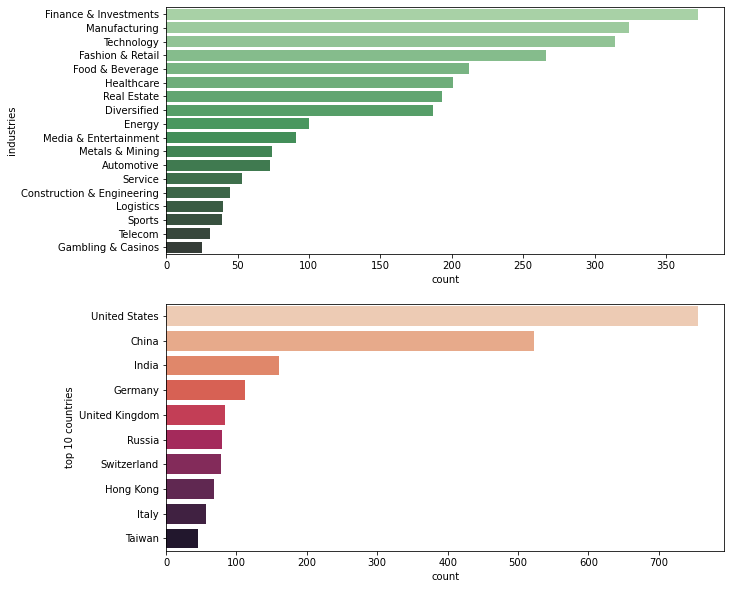

In [10]:
#what industries are billionares the most
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import rcParams
# Specify the figure size in inches, for both X, and Y axes
rcParams['figure.figsize'] = 10,10
plt.subplot(2,1,1)
sns.countplot(data=data_b , y="industries", palette="Greens_d",order=data_b.industries.value_counts().index)
plt.subplot(2,1,2)
rcParams['figure.figsize'] = 35,15
sns.countplot(data=data_b , y="country", palette="rocket_r",order=data_b.country.value_counts().iloc[:10].index)
plt.ylabel("top 10 countries")

# where are them dollars at $$$$$$$

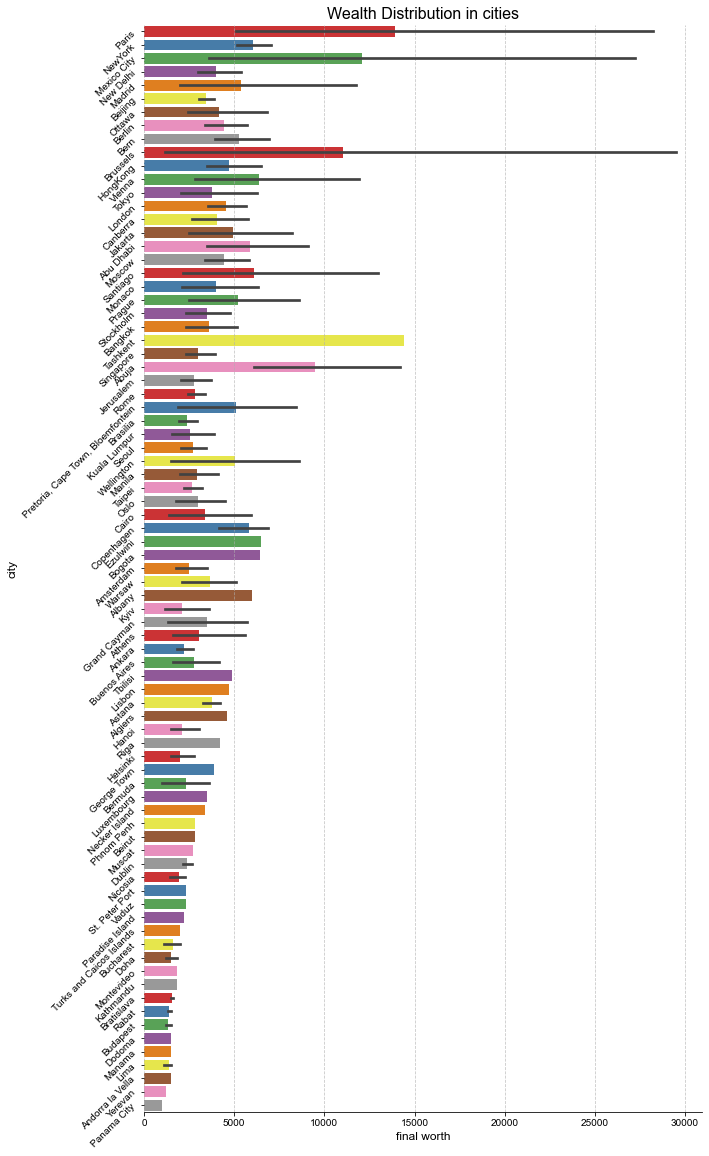

In [11]:
plt.figure(figsize=(10,20))
sns.barplot(data=data_b, x='finalWorth', y='city',palette='Set1')
plt.title('Wealth Distribution in cities', fontsize=16)
plt.xlabel('final worth', fontsize=12)
plt.ylabel('city', fontsize=12)
plt.yticks(rotation=45)
# Customize the grid style and background color
sns.set_style("whitegrid")
sns.despine(left=True)
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Investigate the age, gender, and birthplace demographics of billionaires.

Text(0.5, 1.0, 'distribution of Age')

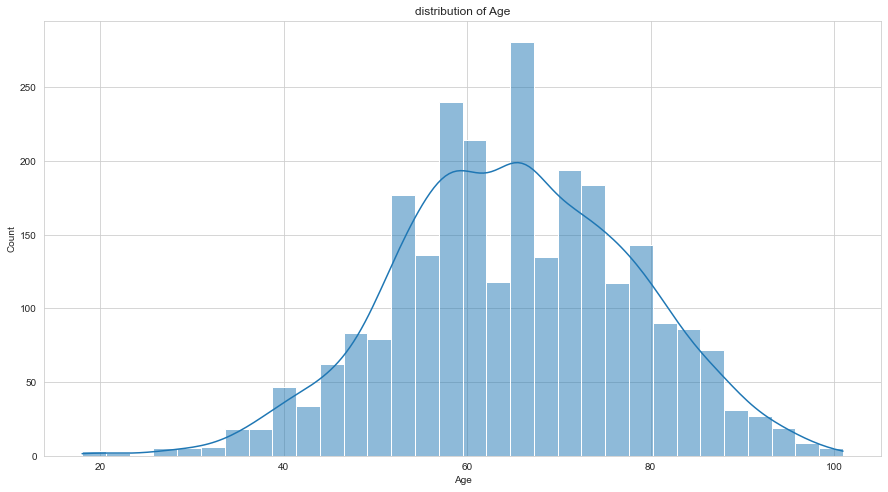

In [12]:
plt.figure(figsize=(15,8))
sns.histplot(data=data_b['age'],kde=True)
plt.xlabel("Age")
plt.title("distribution of Age")


a majority of the billionares are between the ages 65 to 80 

Text(0, 0.5, 'status of billionare ')

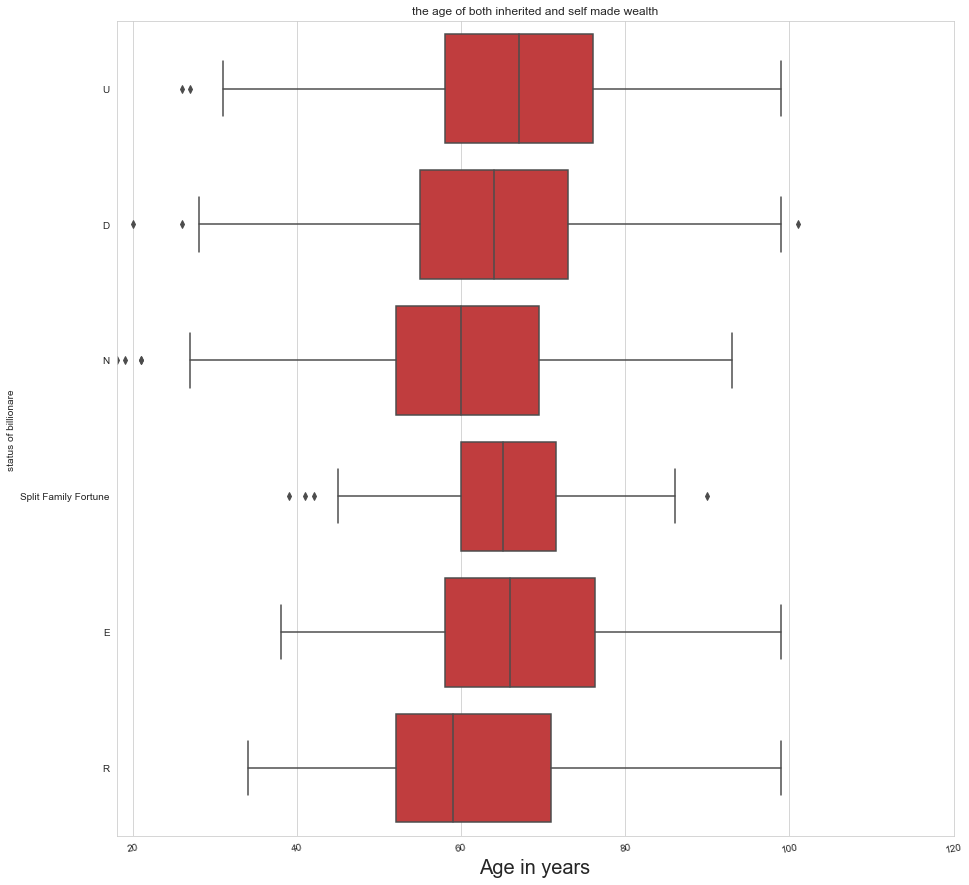

In [13]:
plt.figure(figsize=(15,15))
base_color = sns.color_palette()[3] 
sns.boxplot(data=data_b, y='status', x='age', color=base_color)
plt.xlim([18,120])
plt.xticks(rotation=10);
plt.title('the age of both inherited and self made wealth')
plt.xlabel('Age in years',fontsize=20)
plt.ylabel('status of billionare ')

# Top 10 billionares

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Bernard Arnault & family'),
  Text(1, 0, 'Elon Musk'),
  Text(2, 0, 'Jeff Bezos'),
  Text(3, 0, 'Larry Ellison'),
  Text(4, 0, 'Warren Buffett'),
  Text(5, 0, 'Bill Gates'),
  Text(6, 0, 'Michael Bloomberg'),
  Text(7, 0, 'Carlos Slim Helu & family'),
  Text(8, 0, 'Mukesh Ambani'),
  Text(9, 0, 'Steve Ballmer')])

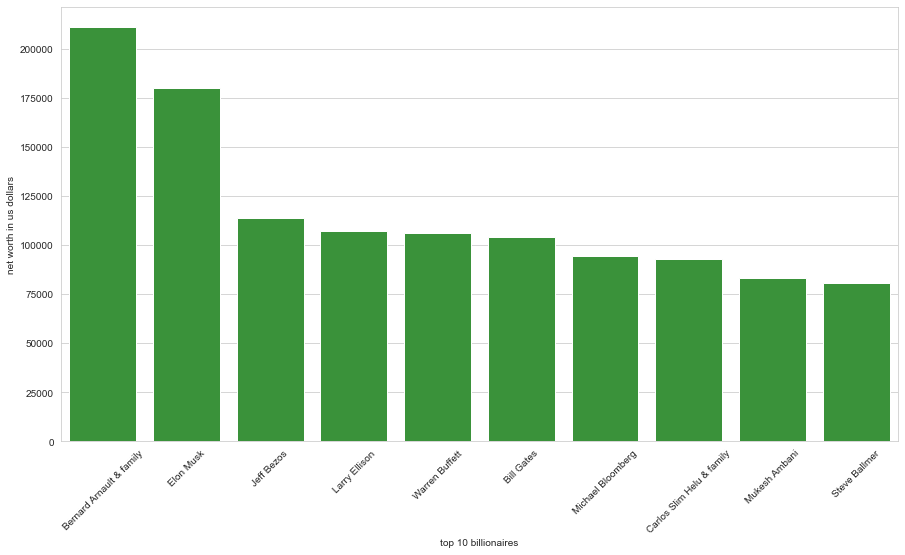

In [14]:
plt.figure(figsize=(15,8))
top_10_billionaires = data_b.sort_values(by='finalWorth', ascending=False).head(10)
# Order the bars from largest to smallest net worth
order = top_10_billionaires['personName']
base_color=sns.color_palette()[2]
sns.barplot(data=data_b,x='personName',y='finalWorth',color=base_color,order=order);
plt.xlabel('top 10 billionaires')
plt.ylabel('net worth in us dollars')
plt.xticks(rotation=45)

# Gender analysis


<AxesSubplot:xlabel='selfMade', ylabel='finalWorth'>

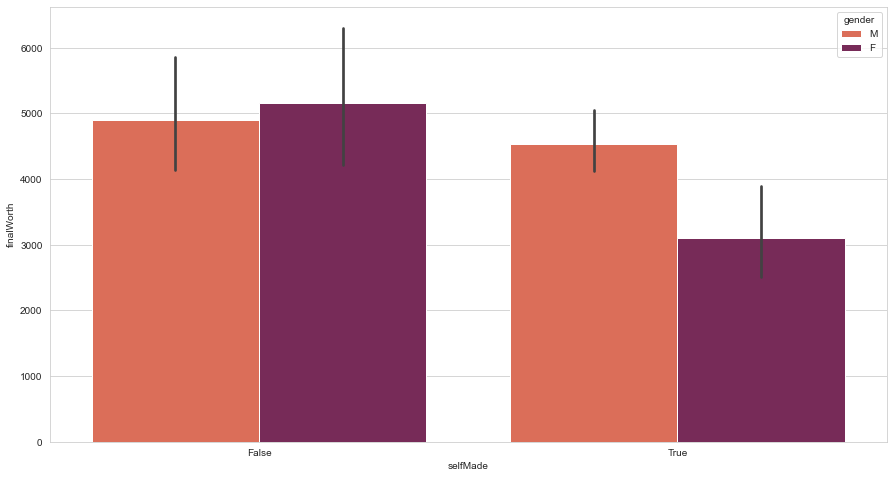

In [15]:
plt.figure(figsize=(15,8))
sns.barplot(x='selfMade',y="finalWorth",data=data_b,hue="gender",palette='rocket_r')

From the bar graph it is evident that there are more male billionares than female billionares , however a small number of the female billionares have inherited their wealth even though not a very significant change from the male counterparts

# Analyze the proportion of self-made billionaires and those who inherited their wealth

In [16]:
values =data_b['selfMade'].value_counts()
proportion = pd.DataFrame({"frequency":values,"proportion":values/(values.sum())*100})
proportion

,frequency,proportion
True,1812,68.636364
False,828,31.363636


68% of the billionares are self made whereas 31% percent of them have inherited their wealth

# correlations between billionaire wealth and economic indicators such as GDP, CPI, and tax rates.

In [17]:
data_b.corr()

,rank,finalWorth,age,selfMade,birthYear,birthMonth,birthDay,cpi_country,cpi_change_country,gdp_country,gross_tertiary_education_enrollment,gross_primary_education_enrollment_country,life_expectancy_country,tax_revenue_country_country,total_tax_rate_country,population_country
rank,1.000000,-0.448930,-0.140998,0.063669,0.143708,-0.042514,-0.042987,0.072364,-0.067207,-0.051262,-0.122108,0.005693,-0.040075,0.020864,0.119359,0.115169
finalWorth,-0.448930,1.000000,0.066951,-0.023831,-0.066721,0.003407,0.059315,-0.042522,0.035436,0.037343,0.066226,-0.008816,0.021660,-0.009203,-0.036116,-0.052677
age,-0.140998,0.066951,1.000000,-0.049557,-0.999061,0.015313,0.081529,-0.001498,0.105621,-0.065353,0.058689,0.063210,0.019438,0.006047,-0.142442,-0.158690
selfMade,0.063669,-0.023831,-0.049557,1.000000,0.050333,0.001391,-0.030345,-0.014400,0.030118,0.250209,0.011692,-0.214381,-0.050421,-0.149006,0.106424,0.212987
birthYear,0.143708,-0.066721,-0.999061,0.050333,1.000000,-0.045066,-0.091512,-0.000615,-0.112699,0.064910,-0.058462,-0.063843,-0.017239,-0.004938,0.144421,0.160363
birthMonth,-0.042514,0.003407,0.015313,0.001391,-0.045066,1.000000,0.221384,0.055065,0.103050,-0.000171,0.047737,0.025352,-0.042777,0.001462,-0.045351,-0.049064
birthDay,-0.042987,0.059315,0.081529,-0.030345,-0.091512,0.221384,1.000000,0.036339,0.141574,-0.032617,0.165980,0.043617,0.004254,0.033067,-0.144766,-0.198463
cpi_country,0.072364,-0.042522,-0.001498,-0.014400,-0.000615,0.055065,0.036339,1.000000,0.436769,-0.293315,-0.455557,0.279555,-0.746990,-0.037021,0.245739,0.217553
cpi_change_country,-0.067207,0.035436,0.105621,0.030118,-0.112699,0.103050,0.141574,0.436769,1.000000,0.379856,0.167135,0.053474,-0.393502,-0.317505,0.003269,0.066272
gdp_country,-0.051262,0.037343,-0.065353,0.250209,0.064910,-0.000171,-0.032617,-0.293315,0.379856,1.000000,0.299104,-0.365660,-0.056557,-0.588749,0.149234,0.451567


There is no correlation rather , no relationship between the billionares wealth anf the gdp,cpi and tax rates 

# Geospatial analysis: Visualize the geographical distribution of billionaires and their wealth on a map

In [18]:
!pip install geopandas
import geopandas as gpd

In [22]:
!pip install folium
import folium
from folium.plugins import MarkerCluster

m = folium.Map(location=[0, 0], zoom_start=2)

marker_cluster = MarkerCluster()

for index, row in data_b.iterrows():
    if not pd.isna(row['latitude_country']) and not pd.isna(row['longitude_country']):
        folium.Marker([row['latitude_country'], row['longitude_country']]).add_to(marker_cluster)

marker_cluster.add_to(m)

m

In [24]:
data_b.to_csv("new_billionare data")